<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% />
</center>

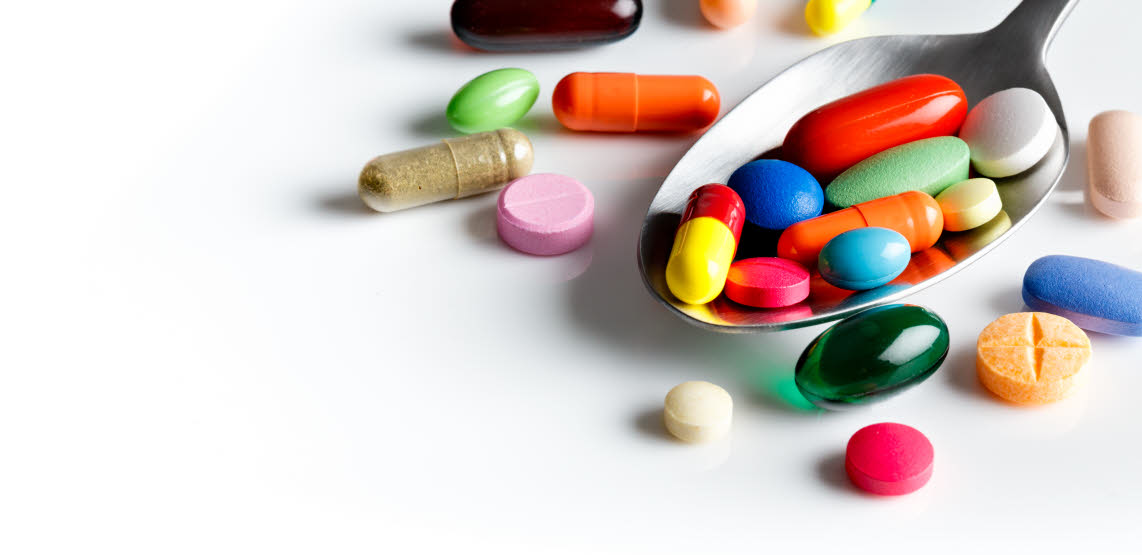

## DRUG PREDICTION (ML - INTERMEDIATE)

**Submitted by SUJEET KUMAR PANDIT**

**PGP DSAI Student, INSAID**

**Batch: JUNE 20,2021**

# **Table of Contents**
1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Processing**](#Section5)<br>
6. [**Exploratory Data Analysis**](#Section6)<br>
7. [**Data Post-Processing**](#Section7)<br>
8. [**Model Development & Evaluation**](#Section8)<br>
9. [**Conclusion**](#Section9)</br>

# **1. Introduction**
### Company Introduction - inLab
##### Your client for this project is a Pharmaceutical Company. - inLab
- 1) They have a long history of making effective drugs and are the leading producer of antibiotics for bacterial infection.
- 2) Their research and development team have recently developed five types of drugs to fight against chronic throat infection.
- 3) They want to quickly release the drug in the market so that they could cure people and increase revenue for the company.
- 4) Their R&D team made a brief analysis of the chemical composition present in the drug and made a brief report stating that each drug has a different effect according to their health.
- 5) The drug which has a higher concentration of chemicals should be given to those groups of people whose health report passes some criteria as suggested by the R&D team.


### Current Scenario
  - The R&D group has invited some groups of people to test the drug, but going through each person’s health report might take a lot of time and cause a delay in launching the drug in the market.

# **2. Problem Statement**
- This section is emphasised on providing some generic introduction to the problem that most companies confront.

### The current process suffers from the following problems:
- Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects.
- Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team.
- This process is time-consuming and wastage of resources.

TThe company has hired you as data science consultants. They want to **automate** the process of assigning the drug according to their health report.

### Your Role
- You are given a dataset containing the health report of the people from the test group.
- Your task is to build a multi-class classification model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. - You need to build the best possible model.

### Project Deliverable
- Deliverable: **Drug classification.**
- Machine Learning Task:**Multi-class classification**
- Target Variable: **Drug**
- Win Condition: **N/A (best possible model)**

### Evaluation Metric
   - The model evaluation will be based on the **Accuracy Score.**

# **3. Installing & Importing Libraries**
- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [3]:
!pip install ydata-profiling                               # Toolbox for Generating Statistics Report

### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [99]:
!pip install --upgrade ydata-profiling

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.

In [1]:
import numpy as np                                             # Importing package Numpy (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                            # Importing package pandas (For Panel Data Analysis)
import ydata_profiling
from ydata_profiling import ProfileReport                      # Import Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                # Importing matplotlib library for visualization
%matplotlib inline
import seaborn as sns                                          # Importing seaborn library for interactive visualization
#--------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                             # Importing library for scientific calculations
#--------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder                 # Importing encoding function
from sklearn.preprocessing import StandardScaler               # Importing StandardScaler function
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score ,recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix, classification_report

#--------------------------------------------------------------------------------------------------------------------------
import warnings                                                # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                              # Warnings will appear only once

# 4. Data Acquisition & Description
This step provides an in-depth description of the dataset associated with this project.

- The dataset contains all the necessary information about the person’s health like their sex, BP, Age, Cholesterol etc.

- We have the health metrics of the person which is an essential factor for transcribing the drug to that person without any side effect.

- This is the data that we have to predict for future samples.
 
#### The dataset is divided into two parts: Train and Test sets.

#### Training Set: 
 - The train set contains **160 rows** and **7 columns**.
 - The last column **Drug** is the **target variable**.

#### Testing Set:
 - The test set contains **40 rows** and **6 columns**.
 - The test set **doesn’t contain** the **Drug** column.
 - It needs to be predicted for the test set.
 

**Train Set:**

| Records |Features|Target Variable|
|:--|:--|:--|
|**160**|**7**|**Drug**|

**Test Set:**

|Records|Features|Predicted Variable|
|:--|:--|:--|
|**40**|**6**|**Drug**|
 
- The Dataset contains the following columns:
 
|***ID***|****Feature****|****Description****|
|:--|:--|:--|
|01| Id             | Unique Identity of the sample|
|02| Age            | Age of the person|  
|03| Sex            | The sex of the person(M and F)| 
|04| BP             | Blood pressure of the person|   
|05| Cholesterol    | The level of cholesterol in a person's body|
|06| Na_to_K        | Sodium and potassium ratio|
|07| IQR            | Interquartile range (in kHz)|
|08| Drug           | Drug: Contains 5 classes of drugs encoded as(drug A : 3, drug B: 4, drug C: 2, drug X: 0, drug Y: 1)|

<a name = Section4></a>
# **4.1. Data Acquisition**

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:

In [2]:
df = pd.read_csv(r"D:\DS Training\Term_Project_24\Term_Project_Gros\Drug_Prediction\drug_train.csv")   #import train data

print('Data Shape:', df.shape)
df.head()

Data Shape: (160, 7)


,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY


 ### **Data Information**
- **Totally there are 7 Columns/Features out of which 3 are NUMERICAL, 4 are CATEGORICAL**
- **Check whether the NUMERICAL Columns have 0s and if they are relevant**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


### **Data Description**

- **To get some quick description out of the data you can use describe method defined in pandas library.**
- **Gives the 5-Point or 5-Number summary and other details such as Count, Mean and Standard Deviation of the data-set**

In [4]:
df.describe()

,Id,Age,Na_to_K
count,160.000000,160.000000,160.000000
mean,99.075000,45.387500,16.194987
std,59.374894,16.101481,7.254689
min,0.000000,15.000000,6.269000
25%,45.500000,32.000000,10.445250
50%,100.500000,46.000000,14.076500
75%,149.500000,58.250000,19.480750
max,199.000000,74.000000,38.247000


In [5]:
df_final = pd.read_csv(r"D:\DS Training\Term_Project_24\Term_Project_Gros\Drug_Prediction\drug_test.csv")#import test data

print('Data Shape:', df_final.shape)
df_final.head()

Data Shape: (40, 6)


,Id,Age,Sex,BP,Cholesterol,Na_to_K
0,95,36,M,LOW,NORMAL,11.424
1,15,16,F,HIGH,NORMAL,15.516
2,30,18,F,NORMAL,NORMAL,8.750
3,158,59,F,LOW,HIGH,10.444
4,128,47,M,LOW,NORMAL,33.542


In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           40 non-null     int64  
 1   Age          40 non-null     int64  
 2   Sex          40 non-null     object 
 3   BP           40 non-null     object 
 4   Cholesterol  40 non-null     object 
 5   Na_to_K      40 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ KB


In [7]:
df_final.describe()

,Id,Age,Na_to_K
count,40.00000,40.000000,40.000000
mean,101.20000,40.025000,15.642475
std,52.12667,17.778534,7.173492
min,9.00000,16.000000,7.261000
25%,65.75000,24.500000,10.735000
50%,94.00000,38.000000,12.867500
75%,148.50000,53.250000,19.100250
max,186.00000,74.000000,33.542000


# **5. Data Pre-Processing**
- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [73]:
# Create a ProfileReport object
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# Generate the report
profile.to_file("drug_prediction_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**5.1 Data Pre-Profiling for TEST SET**

In [74]:
# Create a ProfileReport object
profile = ProfileReport(df_final, title='Pandas Profiling Report', explorative=True)

# Generate the report
profile.to_file("drug_prediction_test_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **6. Exploratory Data Analysis**

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - **Handling/Checking Duplicate Data for both the TRAIN and TEST Data Sets**

  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

-**There are actually NO DUPLICATE RECORDS/ROWS in the DATA-SETS**



In [8]:
df[df.duplicated()]

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [9]:
df_final[df_final.duplicated()]

,Id,Age,Sex,BP,Cholesterol,Na_to_K


-**Now Check ALL the NUMERICAL COLUMNS for ZERO values and Replace/Substitute them with appropriate values**

In [10]:
df.isnull().sum()

Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
(df == 0 ).sum(axis = 0)

Id             1
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [12]:
df_final.isnull().sum()

Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
dtype: int64

In [13]:
(df_final == 0 ).sum(axis = 0)

Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
dtype: int64

### **Check whether the DataSet is Balanced**

DrugY    76
drugX    43
drugA    17
drugB    13
drugC    11
Name: Drug, dtype: int64

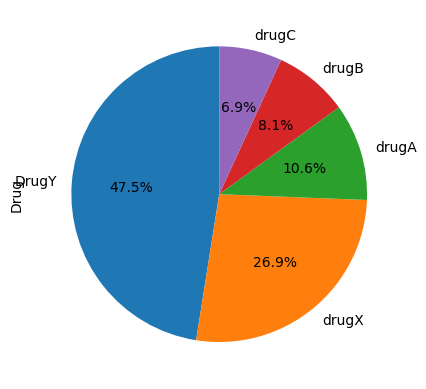

In [14]:
df.Drug.value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90);
df.Drug.value_counts()

#### **Question:** What is the distribution of the **target** feature?

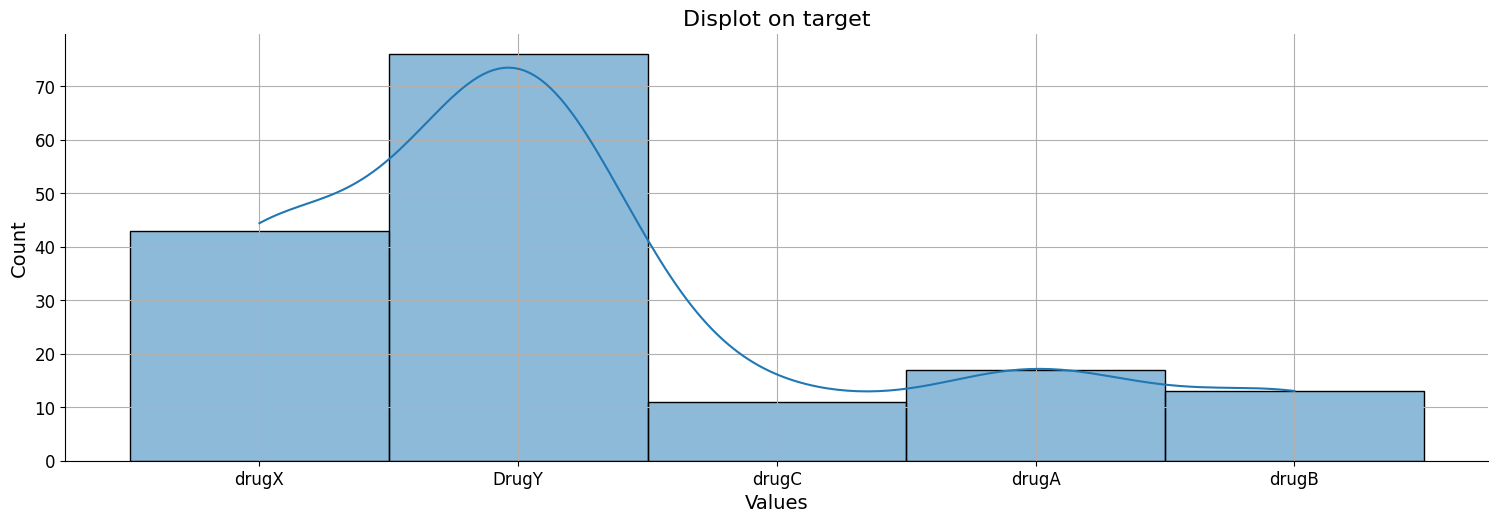

In [15]:
# Plot a displot on target variable
sns.displot(x='Drug', data=df, kde=True, aspect=3)

# Add some cosmetics
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Values', size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label='Displot on target', size=16)
plt.grid(b=True)

# Display the plot
plt.show()

#### Q. Which category has the highest proportion in the Sex column in train data?

In [16]:
df['Sex'].value_counts()

M    83
F    77
Name: Sex, dtype: int64

#### Q. What is the range of values (minimum to maximum) in the Age column of the train data ?

<AxesSubplot: xlabel='Age', ylabel='Density'>

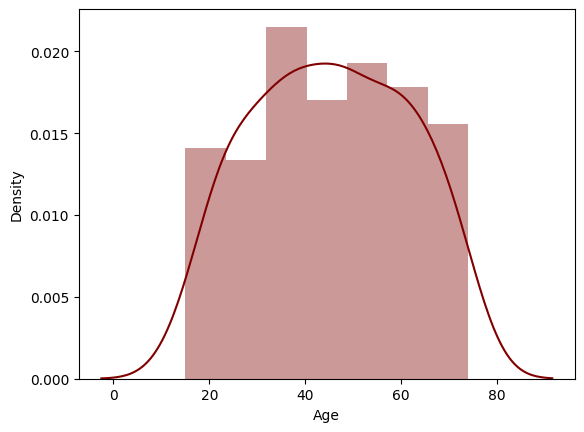

In [17]:
sns.distplot(a= df.Age , kde=True, color = 'maroon')

#### Q. What is the range of values (minimum to maximum) in the NA_to_K column of the train data ?

In [25]:
df.describe()

,Id,Age,Na_to_K
count,160.000000,160.000000,160.000000
mean,99.075000,45.387500,16.194987
std,59.374894,16.101481,7.254689
min,0.000000,15.000000,6.269000
25%,45.500000,32.000000,10.445250
50%,100.500000,46.000000,14.076500
75%,149.500000,58.250000,19.480750
max,199.000000,74.000000,38.247000


#### Q. What is the minimum value for Na_to_K for DrugY in the training dataset?

In [18]:
# Filter the DataFrame to include only entries with the label "DrugY"
drugY_data = df[df['Drug'] == 'DrugY']

# Find the minimum value of Na_to_K for DrugY
min_na_to_k_for_drugy = drugY_data['Na_to_K'].min()

print("Minimum value of Na_to_K for DrugY:", min_na_to_k_for_drugy)

Minimum value of Na_to_K for DrugY: 15.015


#### check the correlation betn features

Text(0.5, 1.0, 'Correlation HeatMap')

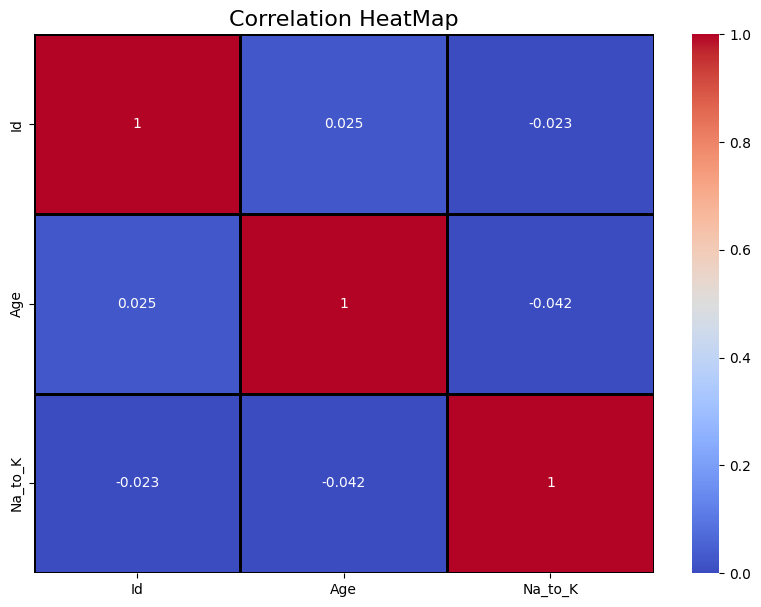

In [19]:
figure = plt.figure(figsize = (10,7))
HeatMap = sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm',vmin = 0, vmax = 1,linecolor = 'black',linewidths = 1)
HeatMap.set_title('Correlation HeatMap', fontdict = {'fontsize':16})

### OBSERVATIONS
- BP and Na_to_K have high correlation with Drug

### Seperating out the Categorical and Numerical columns

In [20]:
df_cat = df[['Sex', 'BP', 'Cholesterol']]

df_num = df[['Age', 'Na_to_K']]

### Transformation of Categorical data

In [21]:
# Importing encoding function
from sklearn.preprocessing import LabelEncoder

#Transformation of categorical variable
df_cat = df_cat.apply(LabelEncoder().fit_transform)

In [22]:
df_cat.head()

,Sex,BP,Cholesterol
0,0,1,1
1,1,2,0
2,0,2,1
3,0,1,0
4,1,2,0


In [23]:
#converting the target column: Drug into 0, 1,2,3,4
drug_scal = df['Drug'].map({"drugX":0, "DrugY":1, "drugC":2, "drugA":3,"drugB":4})

### Transforming the numerical data

In [24]:
# Importing StandardScaler function
from sklearn.preprocessing import StandardScaler

# Instantiating a standard scaler object
scaler = StandardScaler()

# Transforming our data
scaled_arr = scaler.fit_transform(df_num)

# Inputting our transformed data in a dataframe
scaled_data = pd.DataFrame(data=scaled_arr, columns=df_num.columns)

# Getting a glimpse of transformed data
scaled_data.head()
scaled_data.describe()

,Age,Na_to_K
count,1.600000e+02,1.600000e+02
mean,-2.081668e-16,4.163336e-17
std,1.003140e+00,1.003140e+00
min,-1.893174e+00,-1.372513e+00
25%,-8.340557e-01,-7.950430e-01
50%,3.815941e-02,-2.929332e-01
75%,8.013477e-01,4.543377e-01
max,1.782590e+00,3.049235e+00


### Merging the Categorical, Numerical & target data

In [25]:
data_model = pd.concat([scaled_data, df_cat, drug_scal], axis = 1)
data_model.head()

,Age,Na_to_K,Sex,BP,Cholesterol,Drug
0,-0.834056,-0.740459,0,1,1,0
1,0.411966,-0.871267,1,2,0,0
2,-0.397948,-0.896848,0,2,1,0
3,-0.771755,2.390909,0,1,0,1
4,-0.709454,0.865739,1,2,0,1


### Split the data into x and y. Meaning y is the DEPENDENT/TARGET variable and x as FEATURE/INDEPENDENT variable

In [26]:
x = data_model.drop('Drug', axis = 1)
x.head()

,Age,Na_to_K,Sex,BP,Cholesterol
0,-0.834056,-0.740459,0,1,1
1,0.411966,-0.871267,1,2,0
2,-0.397948,-0.896848,0,2,1
3,-0.771755,2.390909,0,1,0
4,-0.709454,0.865739,1,2,0


In [27]:
y = data_model['Drug']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Drug, dtype: int64

# **7. Data Post Processing**

### **7.2 Data Splitting**

- Now we will split our data into train set and test set.

- We will keep **80%** data in the **train** set, and **20%** data in the **test** set.

### Import the train test split and split the data into train and test data for x and y.

In [28]:
#importing the train test split function
from sklearn.model_selection import train_test_split

In [29]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Display the shape of training and testing data
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (128, 5)
y_train shape:  (128,)
x_test shape:  (32, 5)
y_test shape:  (32,)


# **8. Model Development & Evaluation**

### Import the Support Vector Machine Classification function and LOAD it

In [44]:
from sklearn.svm import SVC
svc = SVC(kernel="linear", C=1)

### Train the Model using x_train and y_train

In [45]:
svc.fit(x_train,y_train)

SVC(C=1, kernel='linear')

### Make the predictions using the trained model for both TRAINING and TESTING data.

In [46]:
y_pred_train = svc.predict(x_train)
y_pred_train

array([1, 1, 0, 1, 4, 3, 0, 1, 1, 1, 2, 0, 1, 1, 4, 4, 1, 1, 1, 1, 3, 1,
       1, 1, 4, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 4, 3, 0, 0, 0, 1, 3, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 3, 1, 0, 1, 1, 1, 3, 4, 4, 1, 1,
       1, 1, 2, 1, 0, 3, 0, 1, 0, 3, 4, 1, 3, 1, 0, 3, 2, 3, 4, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 3, 0, 2, 1, 0, 1, 3, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 3, 1, 1, 1, 0, 3, 4, 1, 2, 3, 1, 2, 0, 1, 1], dtype=int64)

In [47]:
y_pred_test = svc.predict (x_test)
y_pred_test

array([1, 1, 1, 1, 0, 4, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 1, 3, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 4, 0, 1], dtype=int64)

In [48]:
svc.score(x_test,y_test)

0.96875

### Importing the evaluation metrics for Classification model 

In [35]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix, classification_report

### Accuracy Score with Training Set

In [49]:
accuracy_score(y_train,y_pred_train)

0.984375

### Accuracy Score with Testing Set

In [50]:
accuracy_score(y_test,y_pred_test)

0.96875

### F1 Score

#### Note: while evaluating multiclass dataset, Calculate F1 score with different averaging methods:  micro,macro,weighted

In [55]:
f1_train_micro = f1_score(y_train,y_pred_train, average='micro')
f1_train_macro = f1_score(y_train,y_pred_train, average='macro')
f1_train_weighted = f1_score(y_train,y_pred_train, average='weighted')

# Print the results
print("F1 score (micro):", f1_train_micro)
print("F1 score (macro):", f1_train_macro)
print("F1 score (weighted):", f1_train_weighted)

F1 score (micro): 0.984375
F1 score (macro): 0.984022898776997
F1 score (weighted): 0.9842489591465001


In [56]:
f1_test_micro = f1_score(y_test,y_pred_test, average='micro')
f1_test_macro = f1_score(y_test,y_pred_test, average='macro')
f1_test_weighted = f1_score(y_test,y_pred_test, average='weighted')

# Print the results
print("F1 score (micro):", f1_test_micro)
print("F1 score (macro):", f1_test_macro)
print("F1 score (weighted):", f1_test_weighted)

F1 score (micro): 0.96875
F1 score (macro): 0.9844077961019491
F1 score (weighted): 0.9686094452773614


## Analyzing the Test File

### Seperate out the Categorical and Numerical Columns in the Test DataSet

In [58]:
df_submission = df_final['Id']
df_submission.head()

0     95
1     15
2     30
3    158
4    128
Name: Id, dtype: int64

In [60]:
df_final_cat = df_final[['Sex', 'BP', 'Cholesterol']]

df_final_num = df_final[['Age', 'Na_to_K']]

### Apply Label Encoding on the Categorical features

In [61]:
# Importing encoder function
from sklearn.preprocessing import LabelEncoder

#Transformation of categorical variable
df_final_cat = df_final_cat.apply(LabelEncoder().fit_transform)
df_final_cat.head()

,Sex,BP,Cholesterol
0,1,1,1
1,0,0,1
2,0,2,1
3,0,1,0
4,1,1,1


### Apply Standard Scaling on the Numerical Features

In [62]:
# Importing StandardScaler function
from sklearn.preprocessing import StandardScaler

# Instantiating a standard scaler object
scaler = StandardScaler()

# Transforming our data
scaled_final_arr = scaler.fit_transform(df_final_num)

# Inputting our transformed data in a dataframe
scaled_final_data = pd.DataFrame(data=scaled_final_arr, columns=df_final_num.columns)

# Getting a glimpse of transformed data
scaled_final_data.head()

,Age,Na_to_K
0,-0.229281,-0.595556
1,-1.368564,-0.017855
2,-1.254636,-0.973066
3,1.080895,-0.733910
4,0.397325,2.527019


### Concatenate the Categorical and Numerical features

In [63]:
df_final_model = pd.concat([scaled_final_data, df_final_cat], axis=1)
df_final_model.head()

,Age,Na_to_K,Sex,BP,Cholesterol
0,-0.229281,-0.595556,1,1,1
1,-1.368564,-0.017855,0,0,1
2,-1.254636,-0.973066,0,2,1
3,1.080895,-0.733910,0,1,0
4,0.397325,2.527019,1,1,1


### Predict the label values using the earlier trained Support Vector Machine Classifier Model

In [65]:
y_pred_test_final = svc.predict(df_final_model)
y_pred_test_final

array([0, 1, 0, 2, 1, 1, 1, 0, 4, 0, 3, 0, 1, 3, 4, 1, 4, 0, 2, 1, 4, 0,
       0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 4, 1, 0, 3, 1, 3], dtype=int64)

### Convert the array into a DataFrame

In [66]:
y_pred_test_final = pd.DataFrame(y_pred_test_final)
y_pred_test_final.head(6)

,0
0,0
1,1
2,0
3,2
4,1
5,1


## Prepare the submission file which should have only two columns viz. the KEY/INDEX column(Id) and TARGET column(Drug)

In [67]:
submission_file = pd.concat([df_submission,y_pred_test_final], axis = 1)
submission_file.head(6)

,Id,0
0,95,0
1,15,1
2,30,0
3,158,2
4,128,1
5,115,1


### To convert Drug values from 0,1,2,3,4 back to drugX, DrugY, drugC, drugA, drugB

In [69]:
submission_file.replace({0:"drugX", 1:"DrugY", 2:"drugC", 3:"drugA", 4:"drugB"}, inplace = True)
submission_file.head()

,Id,0
0,95,drugX
1,15,DrugY
2,30,drugX
3,158,drugC
4,128,DrugY


In [71]:
# number of rows of submission file
submission_file.value_counts().sum()

40

### Remove HEADER and INDEX from submission file

In [72]:
submission_file.to_csv('C:/Users/Kanishk/Downloads/Drug_Predition_submission.csv', header=False, index=False)

<a name = Section9></a>

---
# **9. Conclusion**
- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **explored** some **questions related** to differnt drug types.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **performed model training**.

- We **observed metrics for our prediction**.

- This **model** now can **help us** in **identifying** which Id what drug type have to be given.